## <font color='red'>Section 8:</font> Model Evaluation and Selection 

      Alem H Fitwi
      PhD Student (Privacy, Deep Learning, Networking (Edge Computing), IoD, Surveillance Systems)
      GA-Data Analyst
      Binghamton University-State University of New York
      December, 2017

We are going to take a look at:

    Preparing data, cleaning, inputing, categorical variables
    Performance metrics, confusion matrix, F1-score
    Splitting the data into training and test sets
    Cross-validation
    Parameter tuning using grid search
    wrap up series

### <font color='green'>8.1 Preparing Data For Machine Learning</font>

Preprocessing data

The sklearn.preprocessing package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.

In general, learning algorithms benefit from standardization of the data set. If some outliers are present in the set, robust scalers or transformers are more appropriate. The behaviors of the different scalers, transformers, and normalizers on a dataset containing marginal outliers is highlighted in Compare the effect of different scalers on data with outliers.

### <font color='green'>Dealing with categorical Variables</font>

Convert categorical variable into dummy/indicator variables

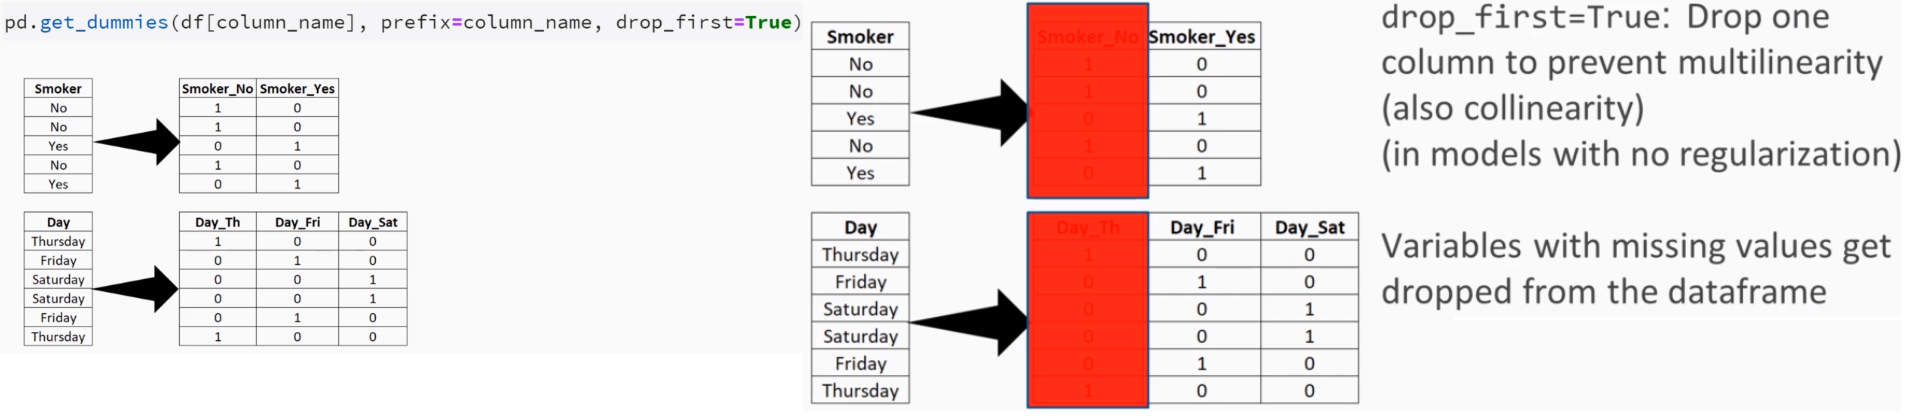

In [248]:
from IPython.display import Image
from IPython.core.display import HTML 
Image('ds_15.png')

In [249]:
# Create a dictionary of categorical variables
dummy={'Smoker':['No','No','Yes','No','Yes','Yes'],
       'Day':['Thursday','Friday','Saturday',
              'Saturday','Friday','Thursday']}

In [250]:
import pandas as pd
df2=pd.DataFrame(dummy)
df2

,Smoker,Day
0,No,Thursday
1,No,Friday
2,Yes,Saturday
3,No,Saturday
4,Yes,Friday
5,Yes,Thursday


In [251]:
pd.get_dummies(df2['Smoker'], prefix='Smoker', drop_first=True)

,Smoker_Yes
0,0
1,0
2,1
3,0
4,1
5,1


In [252]:
pd.get_dummies(df2['Day'], prefix='Day', drop_first=True)

,Day_Saturday,Day_Thursday
0,0,1
1,0,0
2,1,0
3,1,0
4,0,0
5,0,1


The first column is hidden!

### <font color='green'>One Hot Encoding</font>

Label Encoding performed to convert object variables into integer variables, or transform numeric variables. A discrete integer for each category starting from 0 is used to replace the values.

Why Use a One Hot Encoding?

A one hot encoding allows the representation of categorical data to be more expressive.

Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.
We could use an integer encoding directly, rescaled where needed. This may work for problems where there is a natural ordinal relationship between the categories, and in turn the integer values, such as labels for temperature ‘cold’, warm’, and ‘hot’.

There may be problems when there is no ordinal relationship and allowing the representation to lean on any such relationship might be damaging to learning to solve the problem. An example might be the labels ‘dog’ and ‘cat’
In these cases, we would like to give the network more expressive power to learn a probability-like number for each possible label value. This can help in both making the problem easier for the network to model. When a one hot encoding is used for the output variable, it may offer a more nuanced set of predictions than a single label.

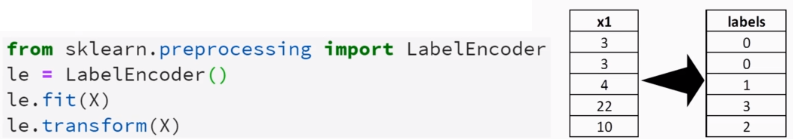

In [253]:
from IPython.display import Image
from IPython.core.display import HTML 
Image('ds_16.png')

In [254]:
# Create sample dictionary
x1={'x1':[3,3,4,22,10]}

In [255]:
# Convert it to dataframe
df2=pd.DataFrame(x1)
x=df2['x1']

In [256]:
# Perform Label Encoding

# Import required package
from sklearn.preprocessing import LabelEncoder

In [257]:
# Instantiate the encoder class
le=LabelEncoder()

In [258]:
# Fit the encoder model
le.fit(x)

LabelEncoder()

In [259]:
# Transform to labels
le.transform(x)

array([0, 0, 1, 3, 2], dtype=int64)

In [260]:
# Putting all together --> Label Encoder for integer encoding

# Perform Label Encoding

# Import required package
from sklearn.preprocessing import LabelEncoder

# Instantiate the encoder class
le=LabelEncoder()

# Fit the encoder model
le.fit(x)

# Transform to labels
le.transform(x)

array([0, 0, 1, 3, 2], dtype=int64)

One Hot Encoder is the sklearn implementation of encoding categorical data. It can be applied to integer variables. All binary columns are preserved.

It creates binary indicator variables

In [261]:
# Label Encoding and One Hot Encoding
# Packages
import warnings
warnings.filterwarnings('ignore')# ignores warnings
from numpy import array
from numpy import argmax

# Encoder packages
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
print(f"The inputs to the encoders:")
print(values)

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(f"The output of Integer Encoding by LabelEncoder():")
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(f"The output of Binary Encoding by OneHotEncoder():")
print(onehot_encoded)

# invert first example
inverted=[]
for i in range(len(data)):
    x = label_encoder.inverse_transform([argmax(onehot_encoded[i, :])])
    inverted.append(x[0])
print(f"The inverse of the outputs of OneHotEncoder():")
print(inverted)

The inputs to the encoders:
['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
The output of Integer Encoding by LabelEncoder():
[0 0 2 0 1 1 2 0 2 1]
The output of Binary Encoding by OneHotEncoder():
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
The inverse of the outputs of OneHotEncoder():
['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']


LabelEncoder takes categorical data or integers and converts them to integer values

OneHotEncoder takes only integers as input and converts them to binary values.

Best to use when you have methods that apply regularization or those that don't solely depend on inverse matrix.


In [262]:
df2['x1']

0     3
1     3
2     4
3    22
4    10
Name: x1, dtype: int64

Impute: represent (something, especially something undesirable) as being done, caused, or possessed by someone; attribute.
"the crimes imputed to Richard"

Finance: assign (a value) to something by inference from the value of the products or processes to which it contributes. "by imputing the interest rates they potentially introduce a measurement error"

Theory: ascribe (righteousness, guilt, etc.) to someone by virtue of a similar quality in another.
"Christ's righteousness has been imputed to us"

### <font color='green'>Data Processing (Handling Missing Data)</font>

### <font color='red'>Imputation of missing values</font>
For various reasons, many real world datasets contain missing values, often encoded as blanks, NaNs or other placeholders. Such datasets however are incompatible with scikit-learn estimators which assume that all values in an array are numerical, and that all have and hold meaning. A basic strategy to use incomplete datasets is to discard entire rows and/or columns containing missing values. However, this comes at the price of losing data which may be valuable (even though incomplete). A better strategy is to impute the missing values, i.e., to infer them from the known part of the data. See the Glossary of Common Terms and API Elements entry on imputation.

In [263]:
# Sample Data column
import pandas as pd
sample=pd.read_csv('sampleMissing.csv')

In [264]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
x    5 non-null float64
y    4 non-null float64
dtypes: float64(2)
memory usage: 176.0 bytes


In [265]:
sample.head()

,x,y
0,2.0,NaN
1,4.0,6.0
2,7.0,8.0
3,9.0,0.0
4,NaN,NaN


In [266]:
# Impute missing data with the mean or the most frequent value
#Imputation of missing values
import warnings
warnings.filterwarnings('ignore')# ignores warnings
from sklearn.preprocessing import Imputer
my_imputer=Imputer(strategy = 'most_frequent')
my_imputer.fit(sample)
my_imputer.transform(sample)

array([[2., 0.],
       [4., 6.],
       [7., 8.],
       [9., 0.],
       [2., 0.],
       [3., 3.]])

In [267]:
# Impute missing data with the mean or the most frequent value
#Imputation of missing values
import warnings
warnings.filterwarnings('ignore')# ignores warnings
from sklearn.preprocessing import Imputer
my_imputer=Imputer(strategy = 'mean')
my_imputer.fit(sample)
my_imputer.transform(sample)

array([[2.  , 4.25],
       [4.  , 6.  ],
       [7.  , 8.  ],
       [9.  , 0.  ],
       [5.  , 4.25],
       [3.  , 3.  ]])

#### <font color='red'>Further on Imputation of missing values</font>

Univariate vs. Multivariate Imputation

One type of imputation algorithm is univariate, which imputes values in the i-th feature dimension using only non-missing values in that feature dimension (e.g. impute.SimpleImputer). By contrast, multivariate imputation algorithms use the entire set of available feature dimensions to estimate the missing values (e.g. impute.IterativeImputer).

Univariate feature imputation

The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.

The following snippet demonstrates how to replace missing values, encoded as np.nan, using the mean value of the columns (axis 0) that contain the missing values:

In [268]:
# Import packages
import numpy as np
from sklearn.impute import SimpleImputer

#Instantiating
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])  
SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values='nan', strategy='mean', verbose=0)

#Sample Dataset
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))  

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


In [269]:
#The SimpleImputer class also supports sparse matrices:
import scipy.sparse as sp
X = sp.csc_matrix([[1, 2], [0, -1], [8, 4]])
imp = SimpleImputer(missing_values=-1, strategy='mean')
imp.fit(X)                  
SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=-1, strategy='mean', verbose=0)
X_test = sp.csc_matrix([[-1, 2], [6, -1], [7, 6]])
print(imp.transform(X_test).toarray())

[[3. 2.]
 [6. 3.]
 [7. 6.]]


In [270]:
#The SimpleImputer class also supports categorical data represented as 
# string values or pandas categoricals when using the 'most_frequent' or 
# 'constant' strategy:
import pandas as pd
df = pd.DataFrame([["a", "x"], [np.nan, "y"],
                    ["a", np.nan],["b", "y"]], 
                    dtype="category") 

In [271]:
df

,0,1
0,a,x
1,NaN,y
2,a,NaN
3,b,y


In [272]:
imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(df))

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]


Multivariate feature imputation

A more sophisticated approach is to use the <font color='red'>IterativeImputer</font> class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

Note This estimator is still experimental for now: the predictions and the API might change without any deprecation cycle. To use it, you need to explicitly import enable_iterative_imputer.

In [273]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])  
IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values='nan', n_nearest_features=None,
                 random_state=0, sample_posterior=False, tol=0.001,
                 verbose=0)
X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]
# the model learns that the second feature is double the first
print(np.round(imp.transform(X_test)))

[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


### <font color='red'>Normalizing Data</font>

In [274]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
X=np.round(imp.transform(X_test))
std_scaler.fit_transform(X)

array([[-1.13554995, -1.13554995],
       [ 1.29777137,  1.29777137],
       [-0.16222142, -0.16222142]])

Normalization is the process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

This assumption is the base of the Vector Space Model often used in text classification and clustering contexts.

The function normalize provides a quick and easy way to perform this operation on a single array-like dataset, either using the l1 or l2 norms:

### <font color='red'>Creating Polynomial Features</font>

In [275]:
X=np.array([[ 1.,  2.],
 [ 6., 12.],
 [ 3.,  6.]])

In [276]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(2) # polynomial degree 2, pow(col#,2) is added
poly.fit(X)
poly.transform(X)

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   6.,  12.,  36.,  72., 144.],
       [  1.,   3.,   6.,   9.,  18.,  36.]])

### <font color='red'>Coding Data Preprocessing</font>

In [277]:
#Import all necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(suppress=True) # prevents scientific representation

Many different ways of reading in a file

In [278]:
# Method-1
import warnings
warnings.filterwarnings('ignore')# ignores warnings
df=pd.read_csv('cleveland.data', sep='\\t', lineterminator='\r')
df.head(5)

,1 0 63 1 -9 -9 -9
0,-9 1 145 1 233 -9 50 20
1,1 -9 1 2 2 3 81 0
2,0 0 0 0 1 10.5 6 13
3,150 60 190 90 145 85 0 0
4,2.3 3 -9 172 0 -9 -9 -9


In [279]:
# Method-2:
import warnings
warnings.filterwarnings('ignore')# ignores warnings
import pandas as pd
df1 = pd.DataFrame.from_csv('cleveland.data', sep="\\t")
df1.head()

""
1 0 63 1 -9 -9 -9
-9 1 145 1 233 -9 50 20
1 -9 1 2 2 3 81 0
0 0 0 0 1 10.5 6 13
150 60 190 90 145 85 0 0
2.3 3 -9 172 0 -9 -9 -9


In [280]:
#Method-3: Webscrapping

path='https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
col_names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach',
           'exang','oldpeak','slope','ca','thal','num']
#https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/
df3=pd.read_csv(path,header=None, names=col_names)
df3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [281]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null object
thal        303 non-null object
num         303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [282]:
df3.shape

(303, 14)

In [283]:
df3.num.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [284]:
df3['num']=np.where(df3.num==0,0,1) # if 0, keep it as it is. Else 1!

In [285]:
df3.num.unique()

array([0, 1], dtype=int64)

In [286]:
df3.thal.unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [287]:
df3.replace('?', np.nan, inplace=True)

In [288]:
df3.thal.unique()

array(['6.0', '3.0', '7.0', nan], dtype=object)

In [289]:
df3['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', nan], dtype=object)

In [290]:
df3.ca=df3.ca.astype(np.float)

In [291]:
df3.thal=df3.thal.astype(np.float)

In [292]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          299 non-null float64
thal        301 non-null float64
num         303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.2 KB


In [293]:
# Check missing values
df3.isnull().sum()
# This may not give the correct figures. Handle missing values first

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Employ visualization to gain insight into your data

<bound method Grid.add_legend of <seaborn.axisgrid.PairGrid object at 0x00000268ACF55F60>>

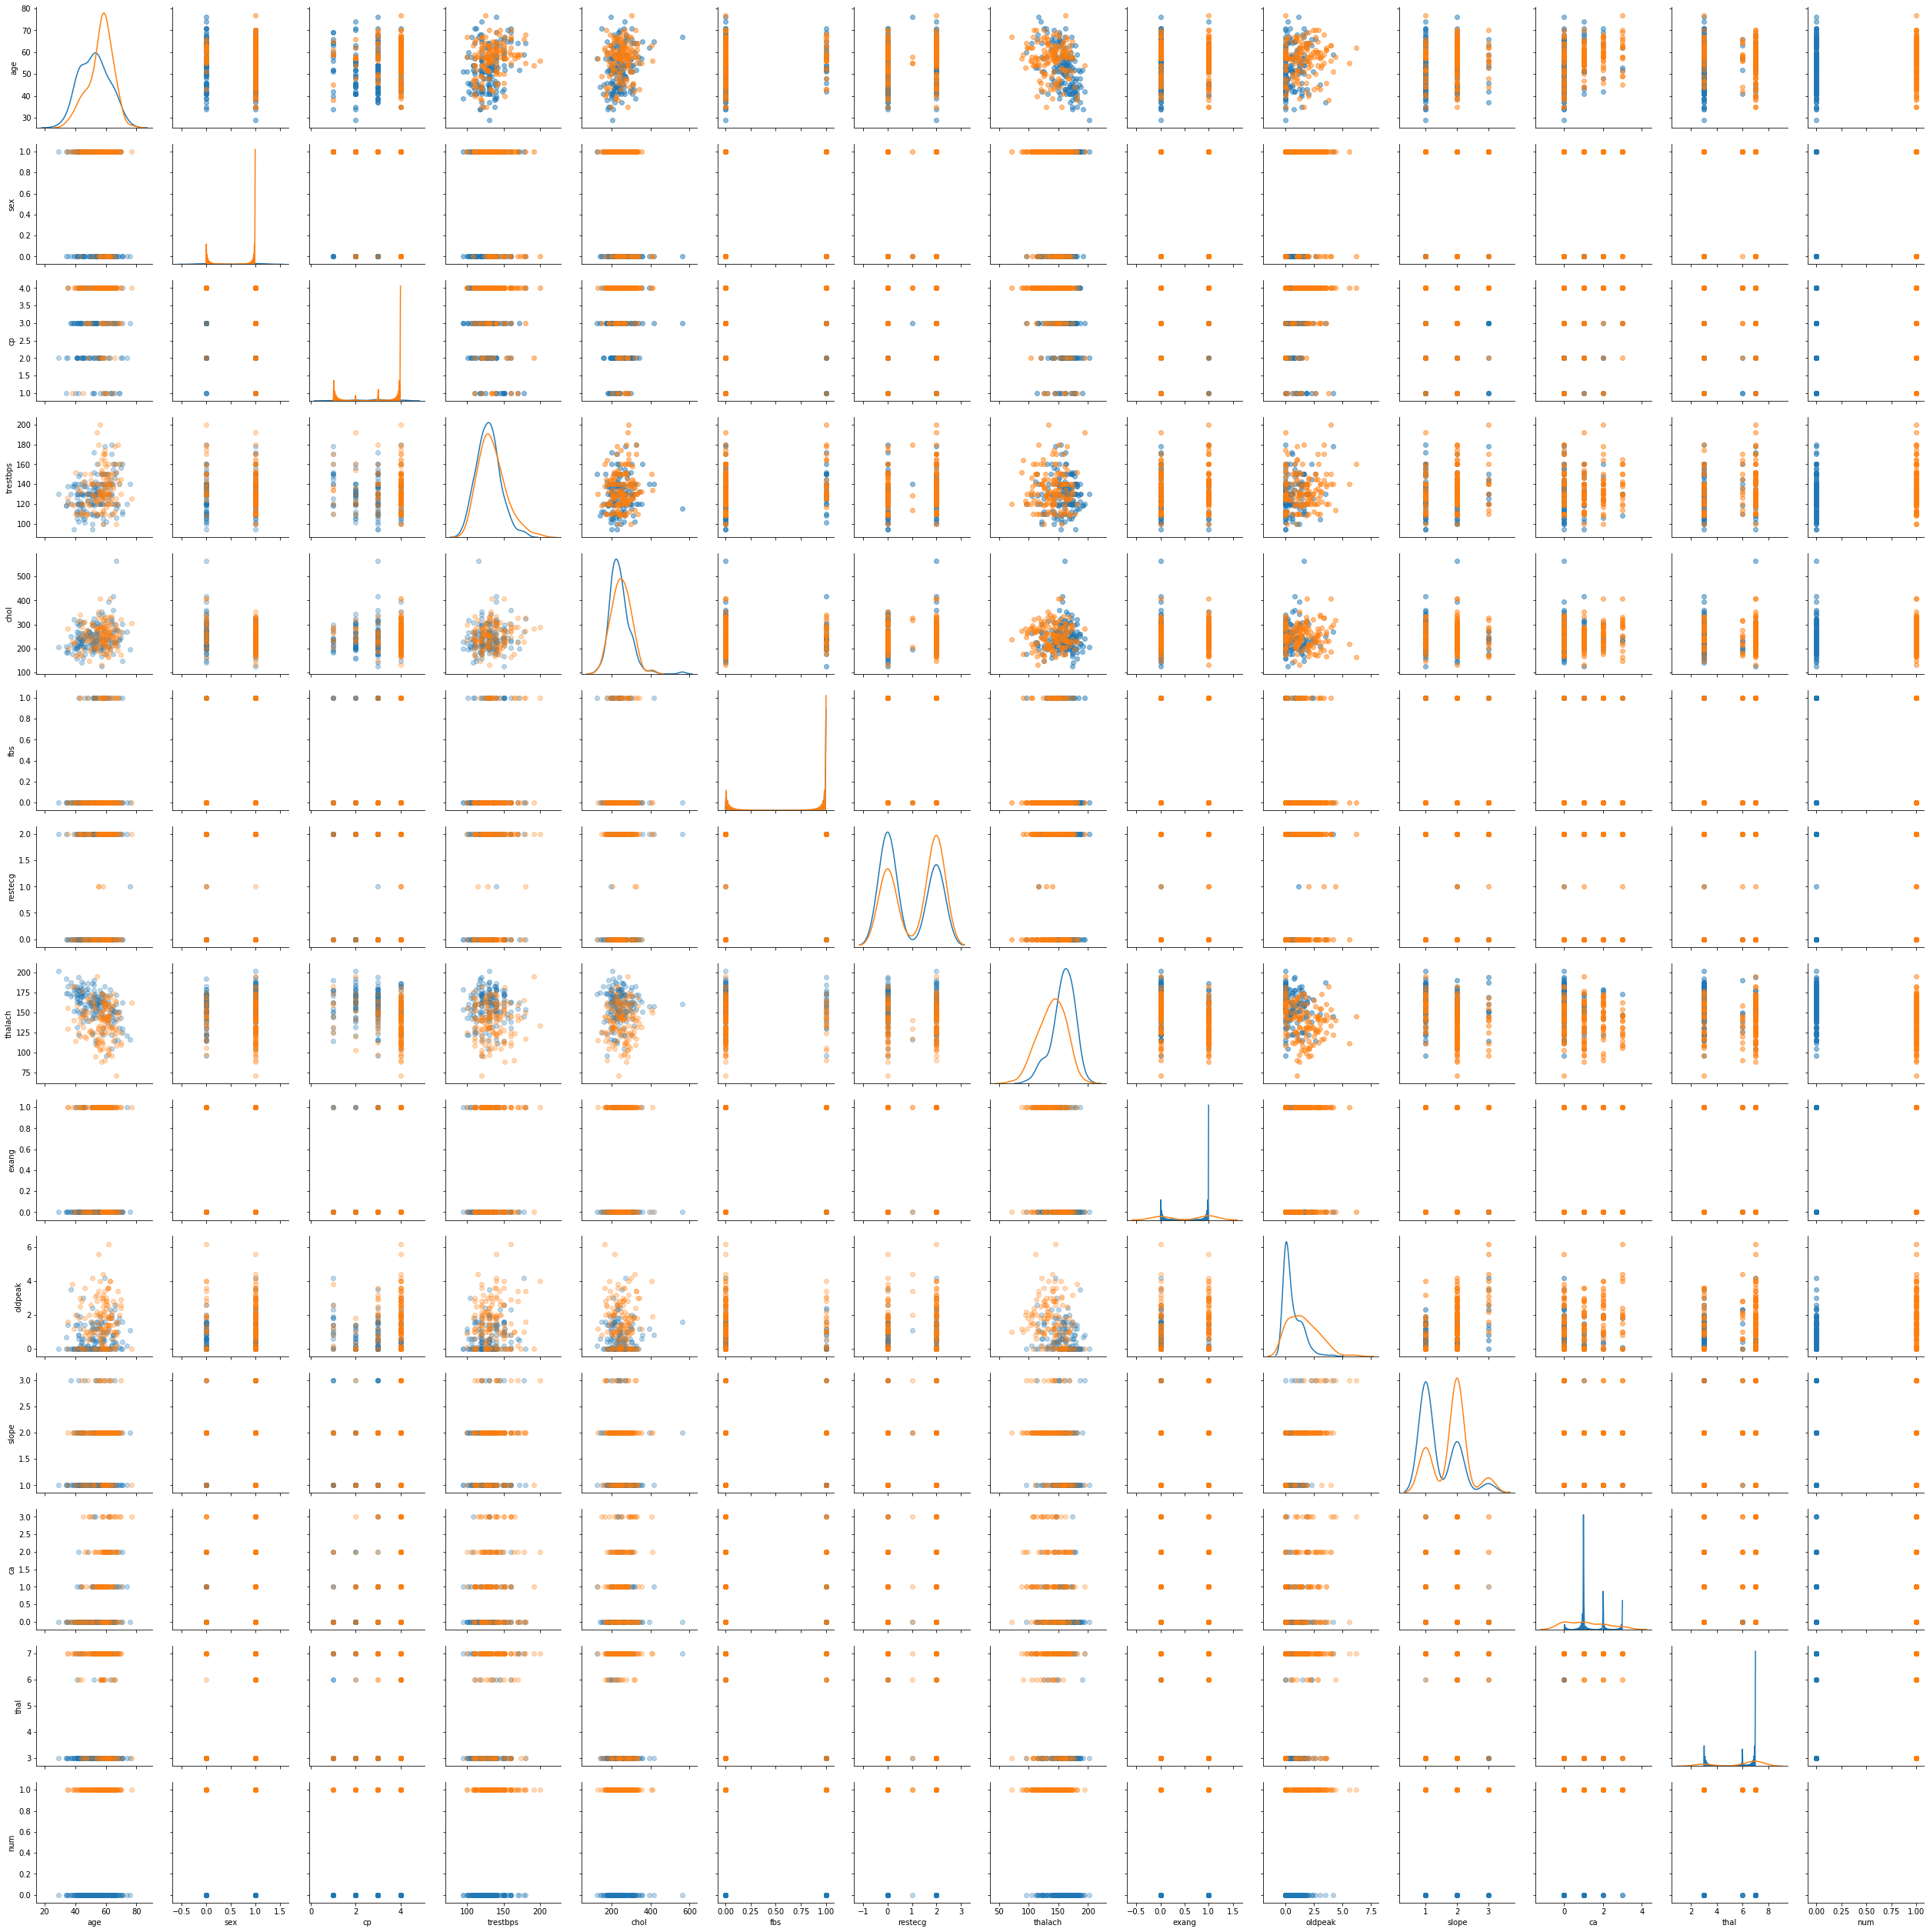

In [294]:
# Construct a pairGrid Graph for comparison
import warnings
warnings.filterwarnings('ignore')# ignores warnings
g=sns.PairGrid(data=df3,diag_sharey=False, hue='num')
g.map_diag(sns.kdeplot)
g.map_upper(plt.scatter, alpha = 0.5)
g.map_lower(sns.regplot, fit_reg=False, scatter_kws={'alpha':0.3})
g.add_legend

In [295]:
# Create the x,y-Matrices
x=df3.drop('num',axis=1)

In [296]:
y=df3.num

In [297]:
# Split x, y-matrices into training and testing datasets

In [298]:
from sklearn.model_selection import train_test_split

In [299]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

In [300]:
# Remove NaN

In [301]:
from sklearn.preprocessing import Imputer

In [302]:
imputer=Imputer(strategy='most_frequent')

In [303]:
imputer.fit(x_train)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='most_frequent',
        verbose=0)

In [304]:
x_train=imputer.transform(x_train)
x_test=imputer.transform(x_test)

In [305]:
# One Hot Encoding (Apply it on cp, restecg, slope, and thal columns)

In [306]:
from sklearn.preprocessing import OneHotEncoder

In [307]:
df3.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [308]:
mask=df3.columns.isin(['cp', 'restecg', 'slope', 'thal'])[:-1]
mask

array([False, False,  True, False, False, False,  True, False, False,
       False,  True, False,  True])

In [309]:
enc=OneHotEncoder(categorical_features=mask, sparse=False)

In [310]:
enc.fit(x_train)

OneHotEncoder(categorical_features=array([False, False,  True, False, False, False,  True, False, False,
       False,  True, False,  True]),
              categories=None, drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', n_values=None, sparse=False)

In [311]:
x_train2=enc.transform(x_train)
x_test2=enc.transform(x_test)

In [312]:
x_train[0]

array([ 45. ,   0. ,   4. , 138. , 236. ,   0. ,   2. , 152. ,   1. ,
         0.2,   2. ,   0. ,   3. ])

In [313]:
x_train.shape

(242, 13)

In [314]:
x_train2[0]

array([  0. ,   0. ,   0. ,   1. ,   0. ,   0. ,   1. ,   0. ,   1. ,
         0. ,   1. ,   0. ,   0. ,  45. ,   0. , 138. , 236. ,   0. ,
       152. ,   1. ,   0.2,   0. ])

In [315]:
x_train2.shape

(242, 22)

### <font color='green'>8.2 Performance Metrics</font>

Take a look at:
    
    how well is our model performing?
    Metrics for regression problems
    Metrics for classification problems
    COnfusion Matrix
    F1 Score

#### <font color="green">Regression Metrics</font>

<font color="green">$R^2$ is a regression metrics</font>

$R^2$ captures values added from a model, or the proportion of the variance of the dependent variable explained by the model (captured by independent variables). It compares the model to the baseline model.

Baseline model does not have any variables. Always predicts the average of the outcome variable.
\begin{align}
SS_{Total} & = \sum_{i=0}^N (y_{i}-\bar{y})^2 \\
SS_{Res} & = \sum_{i=0}^N (\hat{y_{i}}-y_{i})^2 \\ 
R^2 & = 1- \frac{SS_{Res}}{SS_{Total}}
\end{align}


In [316]:
# The R-squared is imported from scikit-learn
from sklearn.metrics import r2_score

<font color="green">Root Mean Square  Error</font>

Another widely used approach for assessing regression problems would be to use RMS Error Metrics

\begin{align}
RMSE & = \sqrt{\frac{1}{N}\sum_{i=1}^N (\hat{y_{i}}-y_{i})^2} \\
\end{align}

In [317]:
# The RMSE is imported from scikit-learn
from sklearn.metrics import mean_squared_error

#### <font color="green">Classification Metrics</font>

Classification error metrics focus on whether the predicted labels match the true class.

Accuracy score
 \begin{align}
Accuracy & = \frac{1}{N}\sum_{i=1}^N 1(\hat{y_{i}}=y_{i}) \\
\end{align}

 \begin{align}
Indicator function \ 1(x) \\
\end{align}

1(x) if if the predicted and actual outputs match; otherwise, 0


In [1]:
# The accuracy score is imported from scikit-learn
# Discrete values
from sklearn.metrics import accuracy_score

<font color="green">Zero-One Loss (Error)</font>

Misclassification Rate

 \begin{align}
Zero-One Loss & = \frac{1}{N}\sum_{i=1}^N 1(\hat{y_{i}}\neq y_{i}) \\
\end{align}

\begin{align}
Indicator function \ 1(x) \\
\end{align}

In [319]:
# The zero-One Loss is imported from scikit-learn
from sklearn.metrics import zero_one_loss

<font color="green">Confusion Metrics</font>

Entry i, j in the confusion matrix shows the number of points actually in group i, but predicted to be in group j.

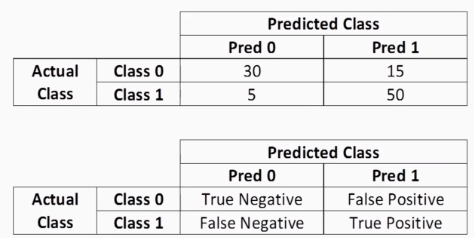

In [320]:
from IPython.display import Image
from IPython.core.display import HTML 
Image('ds_17.png')

<font color="red">True Positives</font>: These are those input that were correctly identified by the algorithm as class-1

<font color="red">True Negatives</font> These are those inputs that don't belong to class-1 and correctly identified as class-0.

<font color="red">False Negatives</font> These are those inputs that belong to class-1 and but wrongly identified as class-0

<font color="red">False Positives</font> These are those input that were incorrectly identified by the algorithm as class-1 while they belong to class-0

In [321]:
# The confusion matrix is imported from scikit-learn
from sklearn.metrics import confusion_matrix

<font color="green">Compute the Precision, Recall, F1 Score </font>

For skewed dataset accuracy score may be highly misleading

\begin{align}
Precision &=\frac{TruePositive}{TruePositive\ +\ FalsePositive} \\
Recall &=\frac{TruePositive}{TruePositive\ +\ FalseNegative} \\
F1Score &=2*\frac{Precision*Recall}{Precision\ +\ Recall} \\
\end{align}

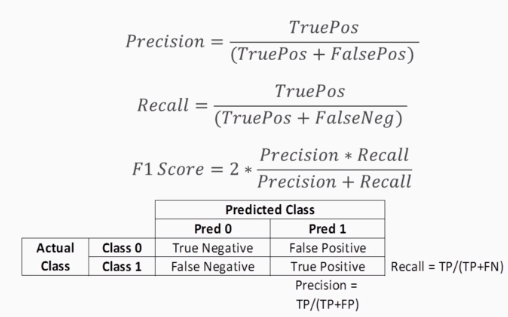

In [322]:
from IPython.display import Image
from IPython.core.display import HTML 
Image('ds_18.png')

Accuracy, Misclassification, Precision, Recall, F1 Score calculation. Accuracy alone could be misleading at times where the data is higly skewed like the last table in the figure below where TN=83.

The sum of the four is always 100!

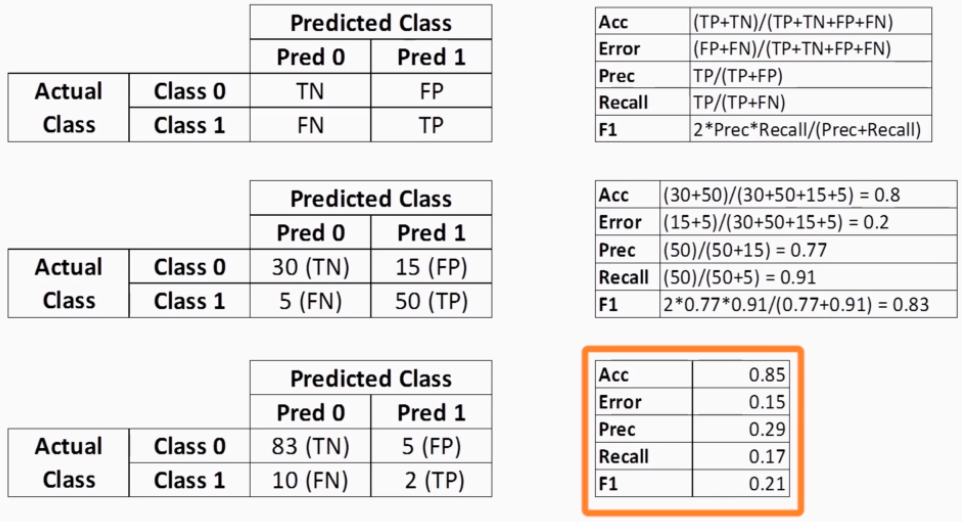

In [323]:
from IPython.display import Image
from IPython.core.display import HTML 
Image('ds_19.png')

#### <font color="green">Coding the Performance metrics</font>

In [324]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [325]:
clf=LogisticRegression()

In [326]:
clf.fit(x_train2,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [327]:
pred=clf.predict(x_test2)

In [328]:
# Accuracy
metrics.accuracy_score(y_test,pred)

0.9016393442622951

In [329]:
# Missclassification rate
metrics.zero_one_loss(y_test,pred)

0.09836065573770492

In [330]:
# Sum of hit and miss must be 1
metrics.accuracy_score(y_test,pred)+metrics.zero_one_loss(y_test,pred)

1.0

In [331]:
# Confusion matrix
metrics.confusion_matrix(y_test,pred)

array([[32,  1],
       [ 5, 23]], dtype=int64)

In [332]:
acc=(32+23)/(32+23+1+5)
acc

0.9016393442622951

In [333]:
prec=(23)/(23+1)
prec

0.9583333333333334

In [334]:
rec=(23)/(23+5)
rec

0.8214285714285714

In [335]:
f1=2*(prec*rec)/(prec+rec)
f1

0.8846153846153847

In [336]:
# Classification report for F1 Score 
rep=metrics.classification_report(y_test,pred)

In [337]:
print(rep)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        33
           1       0.96      0.82      0.88        28

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



### <font color='green'>8.3 Bias Variance Trade off</font>

Look at: 

    Overfitting
    Bias/Variance Tradeoff
    Train-Test Split

<font color="red">Training error:</font> The data that was used during the training (The same training and testing data)
        
<font color="red">Test error:</font> Unseen Data
        
Training error will underestimatine the test error, sometimes by a large margin

Training and testing on the same set has th epotential of overfitting

The more the complexity of a model, the lesser the training error will be. However, after some decrease the test error will in general increase. because after a while the model rather than learning the signal, it starts to learn the noise in the data (large variance). This is called overfitting.

Underfitting is contrary to overfitting where the model is too simple to make any good prediction.

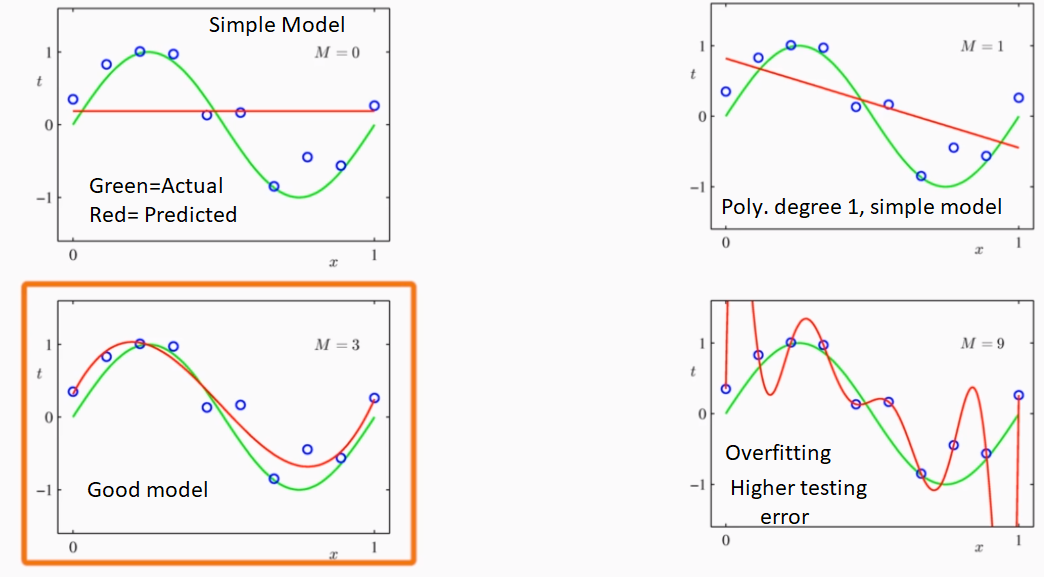

In [338]:
from IPython.display import Image
from IPython.core.display import HTML 
Image('ds_20.png')

A tradeoff between bias and variance must be made.

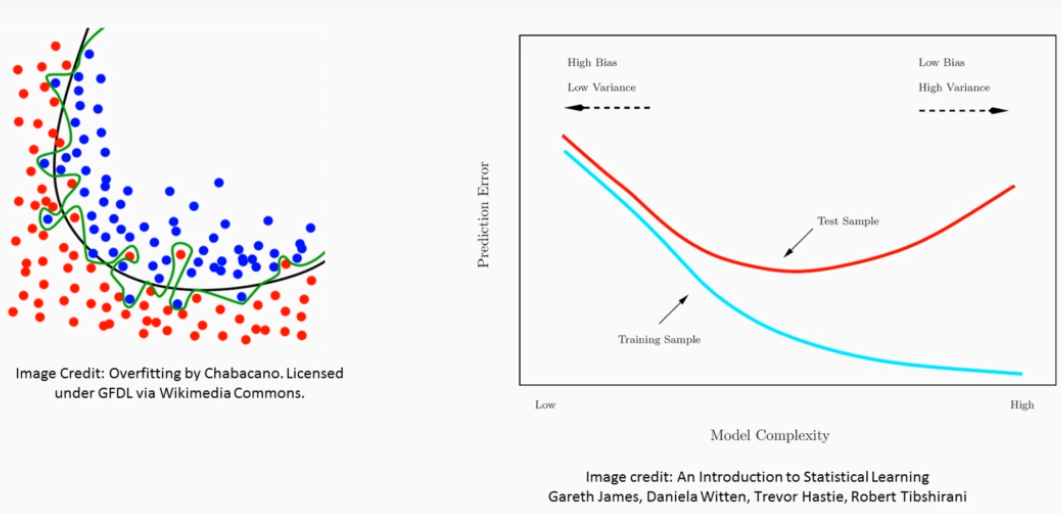

In [339]:
from IPython.display import Image
from IPython.core.display import HTML 
Image('ds_21.png')

The green line is the decision boundary but as can be seen from the pciture there is a large variance.

Simple model is characterized by higher bias and low variance while a complex model is characterized by low bias (low error) and high variance. Hence, a tradeoff between the two must be made. The middle ground should be correctly determined.

Drawin the test and training erros can help you judge where your model lies.

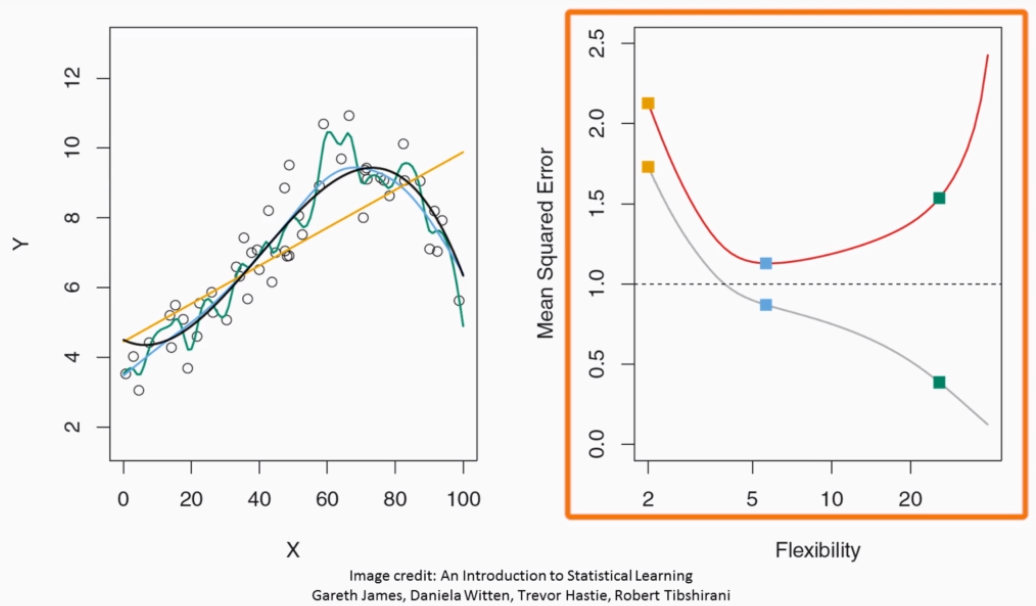

In [340]:
from IPython.display import Image
from IPython.core.display import HTML 
Image('ds_22.png')

Comparison of three models: Simple, Moderate, Complex

<font color='blue'>Train-Test Split</font>

Split the train data randomly into train and test (validation) portions

Generally 80-20, or 70-30 splits are preferred

Check the accuracy of your model on the validation set

Choose the model with the lowest validation error

Train a model one dataset and test it with unseen test data set

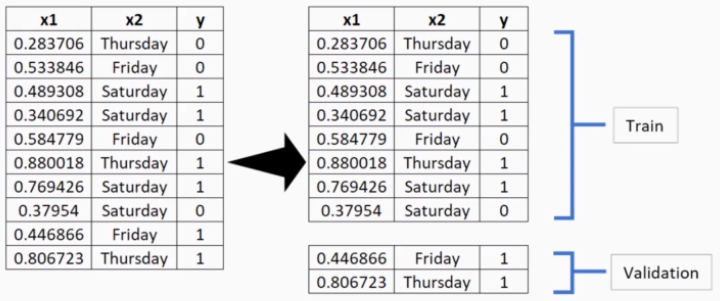

In [341]:
from IPython.display import Image
from IPython.core.display import HTML 
Image('ds_23.png')

In [342]:
from sklearn.linear_model import LogisticRegression

In [343]:
clf=LogisticRegression(C=1) #Inverse of regularization

In [344]:
# Complexity levels
c_vals=[0.001,0.001,0.01,0.03,0.1,0.3,0.6,1,1.3,1.6,2,5,10,15,20,50,100]

In [345]:
scores=[]
for c in c_vals:
    clf=LogisticRegression(C=c)
    clf.fit(x_train2,y_train)
    pred=clf.predict(x_test2)
    scores.append(metrics.zero_one_loss(y_test,pred))

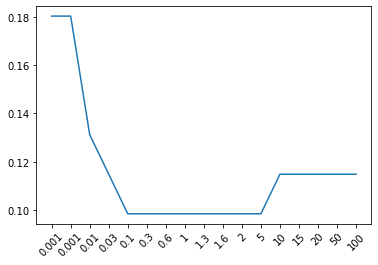

In [346]:
plt.plot(scores)
plt.xticks(np.arange(len(c_vals)),c_vals, rotation=45)
plt.show()

Test dataset should be used only once by our model to check the accuracy. It should never be used over and over again by the model for it might leak info about the test data into the training phase. This might result in overfitting!

Hence, a validation data must be created for continuous testing of the model. Further split the training set into training and validation datasets.

Validation dataset a small test dataset can be used several times to improve our model and eventually select the best model.


In [347]:
x_train_val, x_val, y_train_val, y_val=train_test_split(x_train2,
                        y_train,test_size=0.20, random_state=20) 

In [348]:
scores_tr=[]
scores_val=[]
for c in c_vals:
    clf=LogisticRegression(C=c)
    clf.fit(x_train_val,y_train_val)
    #Training error
    pred=clf.predict(x_train_val)
    scores_tr.append(metrics.zero_one_loss(y_train_val,pred))
    #Validation Error
    pred=clf.predict(x_val)
    scores_val.append(metrics.zero_one_loss(y_val,pred))

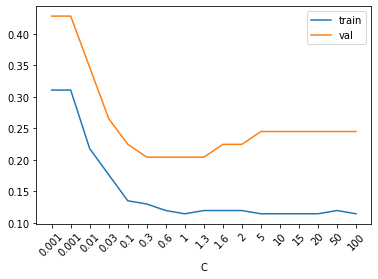

In [349]:
plt.plot(scores_tr, label='train')
plt.plot(scores_val, label='val')
plt.xticks(np.arange(len(c_vals)),c_vals, rotation=45)
plt.xlabel('C')
plt.legend()
plt.show()

### <font color='green'>8.4 Cross-Validation</font>

split the train data randomly into K equal parts. Use one part for validation and K-1 parts for training and get the validation error. Repeat this for each k, and at the end calculate the average error.

Choose the model with the lowest average K-fold error

5-fold CV example: one part for validation and 4 parts for training. 

Validation set changes in every iteration.

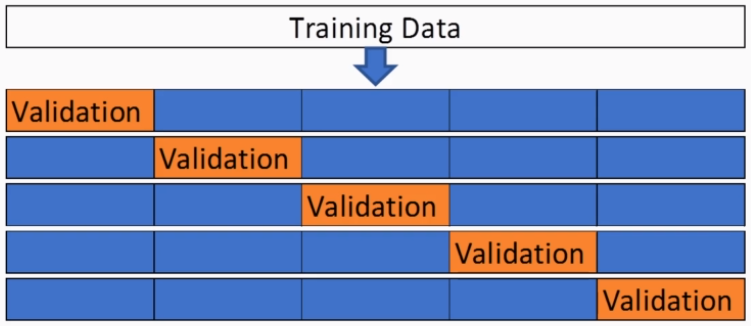

In [350]:
from IPython.display import Image
from IPython.core.display import HTML 
Image('ds_24.png')

Better estimate of the out-of-sample error compared to a single train/test split since the variance is lower.

More costly, since the training is done K-times

The K-fold CV, if time permits, can be repeated several times to come even closer to th elikely out-of-sample accuracy.

can be applied to evaluate:
    
    The effect of a feature
    Tune the parameters of a model
    Estimate out-of-sample accuracy
    
By the "sample" it is meant the data sample that you are using to fit the model:
    
    First - you have a sample (training dataset)
    Second - you fit a model on the sample
    Third - you can use the model for forecasting 
    If you are forecasting for an observation that was part of the data sample - it is in-sample forecast.
    If you are forecasting for an observation that was not part of the data sample - it is out-of-sample forecast.
    
So the question we have to ask ourselves is: Was the particular observation used for the model fitting or not ? If it was used for the model fitting, then the forecast of the observation is in-sample. Otherwise it is out-of-sample.
       

In [351]:
from sklearn.model_selection import cross_val_score

In [352]:
clf=LogisticRegression()

In [353]:
cvs=cross_val_score(clf, x_train2, y_train, scoring='accuracy',cv=5)

In [354]:
cvs=[]
for c in c_vals:
    clf=LogisticRegression(C=c)
    scores=cross_val_score(clf, x_train2, y_train, scoring='accuracy',cv=5)
    cvs.append(scores.mean())    

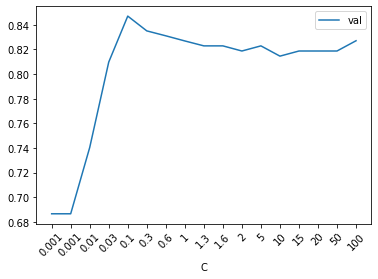

In [355]:
plt.plot(cvs, label='val')
plt.xticks(np.arange(len(c_vals)),c_vals, rotation=45)
plt.xlabel('C')
plt.legend()
plt.show()

In [356]:
#Accuracy
np.array(cvs)

array([0.6865    , 0.6865    , 0.74033333, 0.80966667, 0.847     ,
       0.835     , 0.831     , 0.82683333, 0.82283333, 0.82283333,
       0.81866667, 0.82283333, 0.8145    , 0.81866667, 0.81866667,
       0.81866667, 0.827     ])

In [357]:
#Maximum accuracy
max(np.array(cvs))

0.8470000000000001

In [358]:
#Minimum accuracy
min(np.array(cvs))

0.6865000000000001

In [359]:
#Errors
error=1-np.array(cvs)
error

array([0.3135    , 0.3135    , 0.25966667, 0.19033333, 0.153     ,
       0.165     , 0.169     , 0.17316667, 0.17716667, 0.17716667,
       0.18133333, 0.17716667, 0.1855    , 0.18133333, 0.18133333,
       0.18133333, 0.173     ])

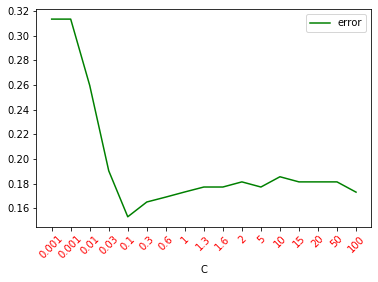

In [360]:
#Plotting the errors
plt.plot(error, label='error', color='green')
plt.xticks(np.arange(len(c_vals)),c_vals, rotation=45, color='red')
plt.xlabel('C')
plt.legend()
plt.show()

### <font color='green'>8.5 Grid Search</font>

Take a look at:
    
    Tunning several hyper parameters without any for loops
    Applying Grid Search
    

Hyper-parameters are parameters that are not directly learnt by an estimator via the training data

They are passed as arguments to the constructor of the estimator classes

In [361]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100) #Number of trees

Tunning the parameters is an important step in model development for it affects the accuracy quite a lot.

In [362]:
nnnnnnfrom sklearn.model_selection import GridSearchCV
clf=LogisticRegression()

In [366]:
# Dictionary of params
params = {'C': c_vals,
          'penalty':['l1','l2']}

In [367]:
grid=GridSearchCV(estimator=clf, param_grid=params, scoring='accuracy', verbose=3, n_jobs=-1)

In [368]:
grid.fit(x_train2, y_train)

Fitting 3 folds for each of 34 candidates, totalling 102 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    4.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.001, 0.01, 0.03, 0.1, 0.3, 0.6, 1, 1.3,
                               1.6, 2, 5, 10, 15, 20, 50, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=3)

In [369]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [371]:
#Best estimator
grid.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [372]:
# CV results
r=grid.cv_results_

In [373]:
r['mean_test_score'] # validation scores

array([0.54132231, 0.67355372, 0.54132231, 0.67355372, 0.62396694,
       0.72727273, 0.64876033, 0.79752066, 0.7768595 , 0.83471074,
       0.82644628, 0.83057851, 0.81818182, 0.83057851, 0.80578512,
       0.83471074, 0.81404959, 0.82231405, 0.80991736, 0.80991736,
       0.80991736, 0.80991736, 0.80578512, 0.80991736, 0.80991736,
       0.81404959, 0.80578512, 0.80578512, 0.80578512, 0.80578512,
       0.79338843, 0.79752066, 0.79338843, 0.79338843])

In [375]:
max(r['mean_test_score']) # maximum validation scores

0.8347107438016529

In [376]:
# DO prediction with the best estimator
pred=grid.predict(x_test2)
acc=metrics.accuracy_score(y_test,pred)
acc

0.9016393442622951

### <font color="green">Summary</font>

<font color='red'>Numpy: enables us to work with 1D and 2D arrays</font>

In [378]:
import numpy as np # fundamental scientific package in python
x=np.arange(12)
y=x.reshape(4,3)
y

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

<font color='red'>Pandas: introduces tableau data format: Series and DataFrame</font>

Pandas Series is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called index. Pandas Series is nothing but a column in an excel sheet.

In [379]:
# From an array:

# import pandas as pd
import pandas as pd
 
# import numpy as np
import numpy as np
 
# simple array
data = np.array(['g','e','e','k','s'])
 
ser = pd.Series(data)
print(ser)

0    g
1    e
2    e
3    k
4    s
dtype: object


In [381]:
# From a list:

import pandas as pd
 
# a simple list
list = ['g', 'e', 'e', 'k', 's']
  
# create series form a list
ser = pd.Series(list)
print(ser)

0    g
1    e
2    e
3    k
4    s
dtype: object


In [382]:
# Accessing
ser[0]

'g'

In [383]:
ser[0:3]

0    g
1    e
2    e
dtype: object

In [384]:
# Python program using astype
# to convert a datatype of series
 
# importing pandas module  
import pandas as pd 
   
# reading csv file from url  
data = pd.read_csv("nba.csv") 
    
# dropping null value columns to avoid errors 
data.dropna(inplace = True) 
   
# storing dtype before converting 
before = data.dtypes 
   
# converting dtypes using astype 
data["Salary"]= data["Salary"].astype(int) 
data["Number"]= data["Number"].astype(str) 
   
# storing dtype after converting 
after = data.dtypes 
   
# printing to compare 
print("BEFORE CONVERSION\n", before, "\n") 
print("AFTER CONVERSION\n", after, "\n")

BEFORE CONVERSION
 Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object 

AFTER CONVERSION
 Name         object
Team         object
Number       object
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary        int32
dtype: object 



In [386]:
# Python program converting
# a series into list
 
# importing pandas module  
import pandas as pd  
   
# importing regex module 
import re 
     
# making data frame  
data = pd.read_csv("nba.csv")  
     
# removing null values to avoid errors  
data.dropna(inplace = True)  
   
# storing dtype before operation 
dtype_before = type(data["Salary"]) 
   
# converting to list 
salary_list = data["Salary"].tolist() 
   
# storing dtype after operation 
dtype_after = type(salary_list) 
   
# printing dtype 
print("Data type before converting = {}\nData type after converting = {}"
      .format(dtype_before, dtype_after)) 
   
# displaying list 
salary_list[0] 

Data type before converting = <class 'pandas.core.series.Series'>
Data type after converting = <class 'list'>


7730337.0

In [389]:
df3.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [391]:
df3.groupby(['sex','cp']).mean()

age    trestbps        chol       fbs   restecg     thalach  \
sex cp                                                                       
0.0 1.0  63.250000  147.500000  247.000000  0.250000  0.500000  149.500000   
    2.0  51.944444  128.055556  251.444444  0.111111  0.888889  162.833333   
    3.0  54.971429  127.885714  261.057143  0.114286  0.885714  151.800000   
    4.0  57.325000  139.075000  268.475000  0.125000  1.100000  145.675000   
1.0 1.0  54.315789  139.473684  235.052632  0.210526  1.368421  157.315789   
    2.0  51.031250  128.593750  241.031250  0.093750  0.687500  162.187500   
    3.0  52.823529  131.941176  232.235294  0.254902  0.823529  157.882353   
    4.0  55.105769  129.557692  243.605769  0.125000  1.125000  138.759615   

            exang   oldpeak     slope        ca      thal       num  
sex cp                                                               
0.0 1.0  0.000000  1.575000  1.500000  0.500000  3.000000  0.000000  
    2.0  0.111111  0.461111  1.333333  0.555556  3.000000  0.111111  
    3.0  0.057143  0.474286  1.428571  0.257143  3.352941  0.028571  
    4.0  0.450000  1.322500  1.800000  0.800000  4.275000  0.550000  
1.0 1.0  0.210526  1.352632  1.789474  0.473684  5.000000  0.368421  
    2.0  0.062500  0.234375  1.312500  0.225806  4.312500  0.218750  
    3.0  0.176471  1.035294  1.549020  0.612245  4.607843  0.333333  
    4.0  0.596154  1.393269  1.711538  0.990291  5.883495  0.798077

1D and 2D arrays creation and manipulation using Numpy

Data Cleaning, and manipulation using pandas

Visualization using matplotlib and seaborn (histograpgs, scatter, boxplot, line graphs, bar plots) that gives us insight about the relationships

Scikit-learn provides for data mining and machine learning development

Datasets out in the Internet:
    
    UCI ML Repository
    World Bank
    Gapminder
    Kaggle

Question 1:
State whether true or false: "One can always use the classification accuracy metric for classification problems to assess the performance of an algorithm no matter what the data is like."

False

Correct. If the data is highly imbalanced where one of the classes has many more points than it is best to make use of other metrics such as precision, recall and f1-score.

Question 2:
State whether true or false: "Normalizing the data points in each variable of a dataset will not have an impact on the performance of the KNN classifier."

False

Correct. It will have an impact, since the KNN depends on the similarity of points which is obtained by computing the distance between them.

Question 3:
State whether true or false: "Regression and Classification are typical Unsupervised Learning problems, while clustering is a typical Supervised Learning problem."

False

Correct. In regression and classification the data points come with labels, while in clustering they do not. Thus regression and classification problems are supervised, while clustering is unsupervised.


Question 4:
State whether true or false: "The scatter plots are useful to assess the relation between two continuous variables. By creating a scatter plot we can see that there is a very strong positive correlation between total_bill and tip."

False

Correct. Although there is a positive relation between the two, the correlation is not very strong. In fact df.corr() shows the correlation value between the two to be 0.68, which can be classified as moderately strong.

Question 5:
State whether true or false: "Pandas is package in python that is predominantly used for visualization."

False

Correct. Although pandas has some graphing capabilities, its main use is in analyzing and manipulating data. This is often referred to as data wrangling.